# Forest Fire: Exploratory Data Analysis 
### Statistics for Data Science W203: Lab 1

**Name: Lance Miles**

**Date: 14 May 2018**

**Section: Monday 4-5:30PM (PST)**

## Instructions Provided by W203 Teaching Team:

### Background

In some areas, forest fires are a major environmental concern, endangering human lives and causing substantial
economic damage. Your team has been hired by an agency that is developing an early warning system to
identify particularly damaging forest fires.

### Data

You are provided with the file **forestfires.csv** , containing measurements taken of recent fires in a Portuguese
park.

As a proxy for how damaging a fire is, you should use the area variable, representing the region burned in
hectares.

The dataset includes a number of meteorological variables. Some of these come from the forest Fire Weather
Index (FWI), a Canadian system for rating fire danger. These include Fine Fuel Moisture Code (FFMC),
Duff Moisture Code (DMC), Drought Code (DC), and Initial Spread Index (ISI).

The following codebook summarizes each variable:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: “jan” to “dec”
4. day - day of the week: “mon” to “sun”
5. FFMC - FFMC index from the FWI system: 18.7 to 96.
6. DMC - DMC index from the FWI system: 1.1 to 291.
7. DC - DC index from the FWI system: 7.9 to 860.
8. ISI - ISI index from the FWI system: 0.0 to 56.
9. temp - temperature in Celsius degrees: 2.2 to 33.
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.
12. rain - outside rain in mm/m2 : 0.0 to 6.
13. area - the burned area of the forest (in hectares): 0.00 to 1090.

### Objective

Conduct an exploratory analysis with the aim of understanding what factors lead to particularly damaging
forest fires.

In [38]:
if(!require(car)){
  install.packages("car")
  library(car)
}
if(!require(repr)){
  install.packages("repr")
  library(repr)
}
if(!require(ggplot2)){
  install.packages("ggplot2")
  library(ggplot2)
}
if(!require(dplyr)){
  install.packages("dplyr")
  library(dplyr)
}

setwd("/Users/lancemiles/Documents/UC Berkeley/Statistics/Lab/Lab 1")

fire = read.csv(file = "forestfires.csv")
fire = data.frame(fire)
sum = summary(fire)
summary(fire)
head(fire)

fire$month = factor(fire$month, levels = c('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'))

fire$day = factor(fire$day, levels = c('mon','tues','wed','thu','fri','sat','sun'))

fire$X.factor = as.factor(fire$X)

fire$Y.factor = as.factor(fire$Y)
nrow(fire)

       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


[1] 517

### Look at forest fires that did most damage.

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,X.factor,Y.factor,area.log
6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0,1090.84,6,5,6.994703
8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0,746.28,8,6,6.615101
7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0,278.53,7,4,5.629526
1,2,sep,NA,91.0,129.5,692.6,7.0,18.8,40,2.2,0,212.88,1,2,5.360729
2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0,200.94,2,2,5.303006
8,6,aug,sun,91.4,142.4,601.4,10.6,19.6,41,5.8,0,196.48,8,6,5.280561


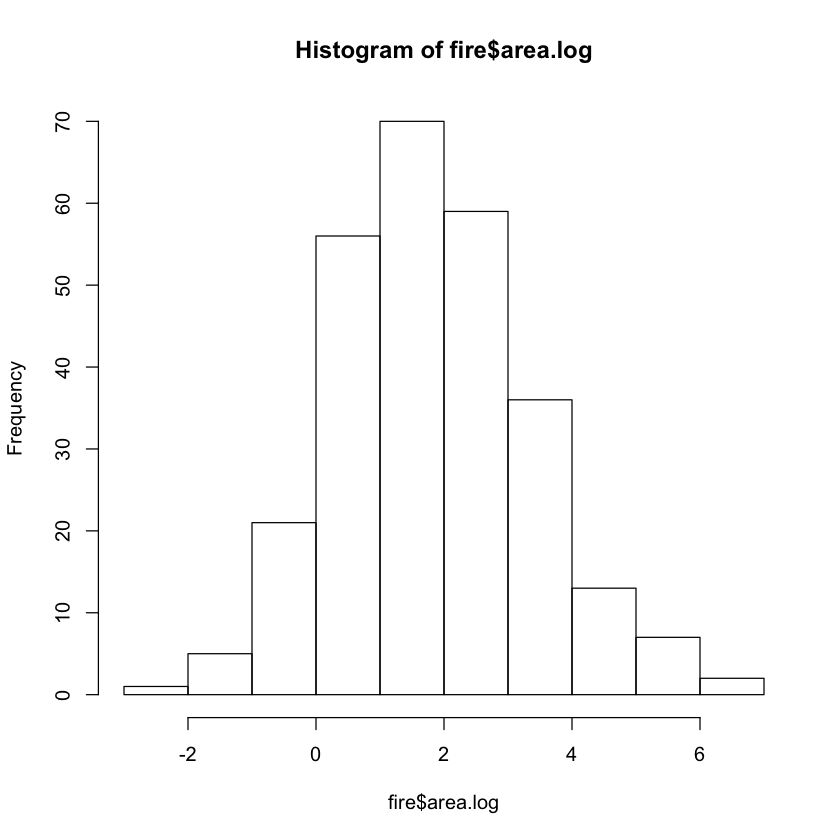

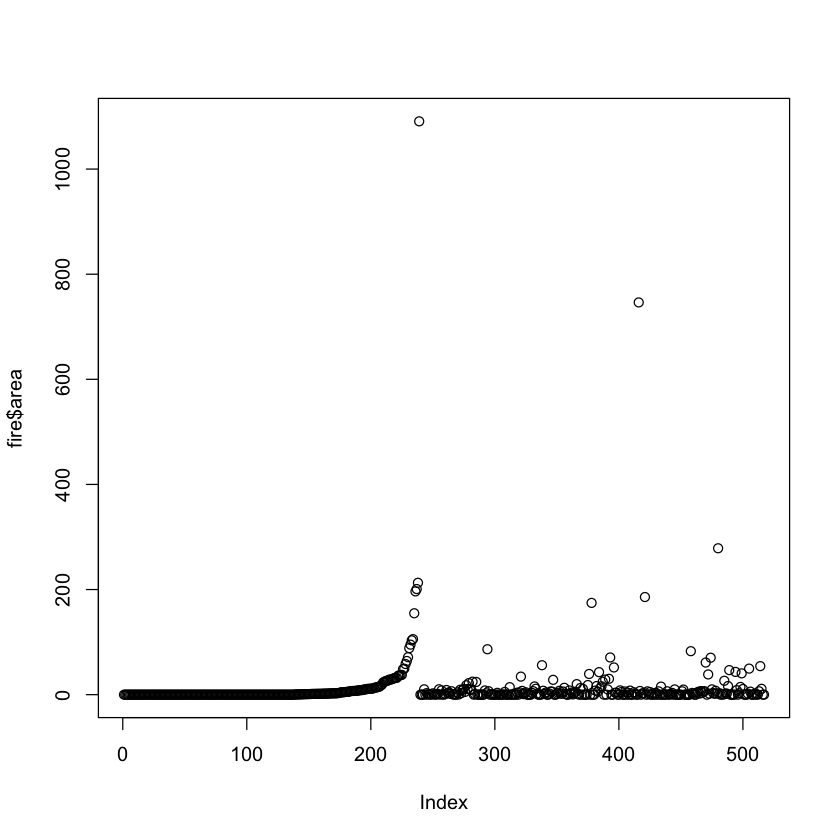

In [2]:
fire$area.log = log(fire$area)
hist(fire$area.log)
biggest = fire %>%
    arrange(desc(area)) 
head(biggest)
plot(fire$area)

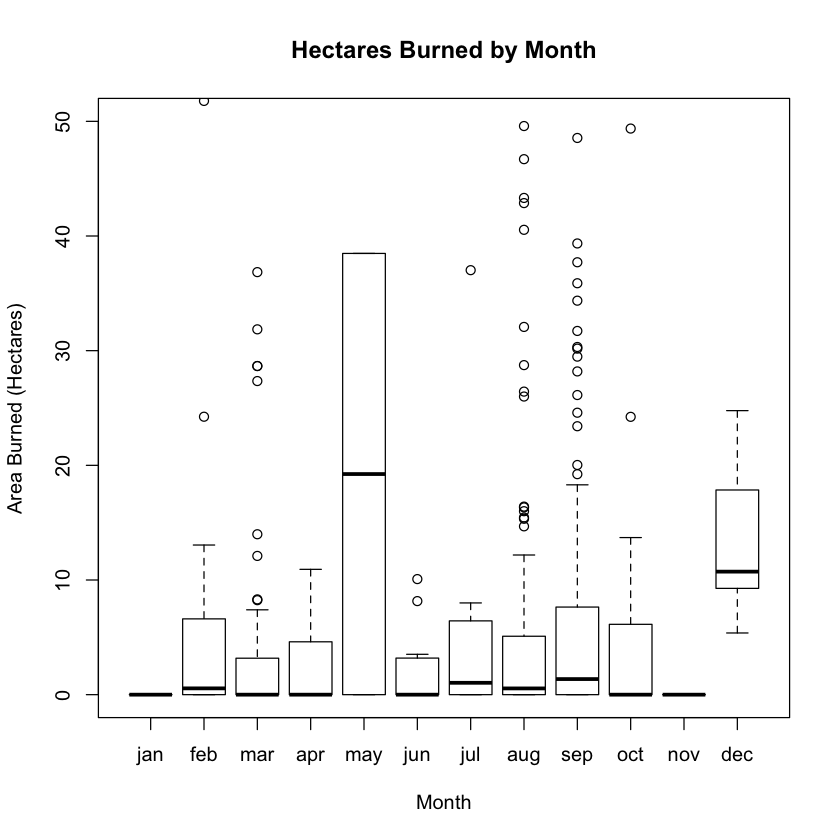

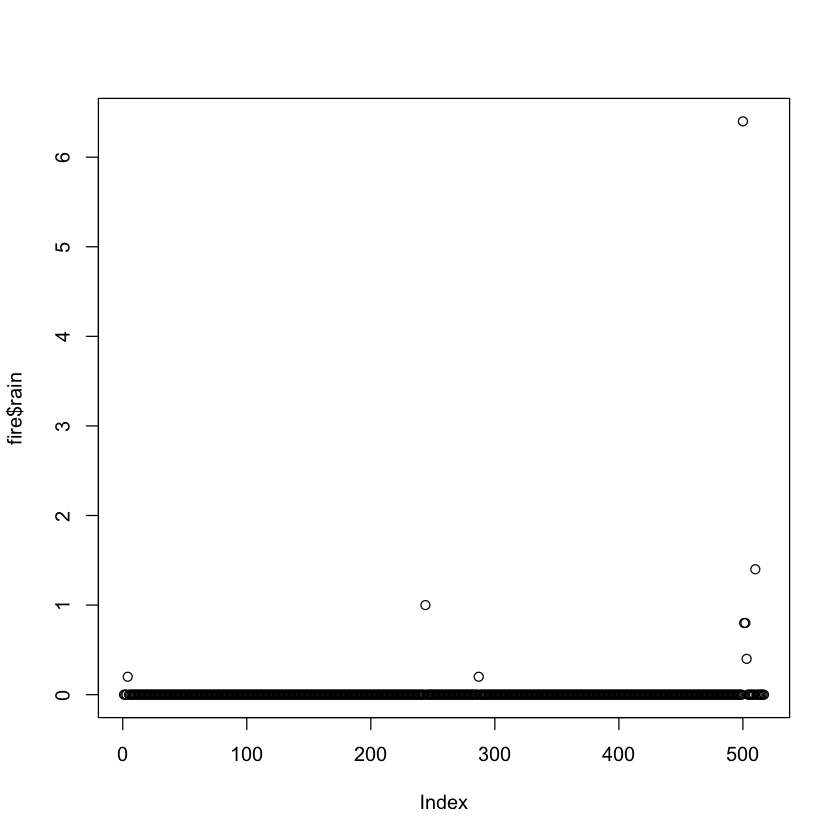

In [26]:
boxplot(area ~ month, data = fire, ylim=c(0, 50),
  xlab = "Month", ylab = "Area Burned (Hectares)",
  main = "Hectares Burned by Month"
)
plot(fire$rain)

## Subsetting the Data
Based on the data presented in the box plot we are defining any fire that burns 10 hectares or more as particularly damaging. 

Rain seems to predominantly take on a value of 0. Although the subset of 8 datapoints that are greater than 0 may hold valuable insights into how fires may have been maintained, or whether or not undergrowth in the following months played a role in a larger fire, rain will not be included for the purpose of this analysis.

In [53]:
fire.sub = subset(fire, area >= 5 & area <=300)
fire.sub2 = subset(fire, area >= 5 & area <=300)
fire.sub2$rain = NULL
fire.sub2$area.log = log(fire.sub2$area)
rain.check = subset(fire, rain > 0)
#nrow(rain.check)
#nrow(fire.sub)
#nrow(fire.sub2)
#summary(fire.sub)
summary(fire.sub2)
#summary(rain.check)

       X               Y             month         day          FFMC      
 Min.   :1.000   Min.   :2.000   sep    :55   sun    :29   Min.   :63.50  
 1st Qu.:3.000   1st Qu.:4.000   aug    :45   sat    :25   1st Qu.:90.20  
 Median :4.000   Median :4.000   mar    :13   fri    :22   Median :91.60  
 Mean   :4.805   Mean   :4.322   jul    : 9   mon    :21   Mean   :90.65  
 3rd Qu.:7.000   3rd Qu.:5.000   dec    : 9   wed    :15   3rd Qu.:92.90  
 Max.   :9.000   Max.   :8.000   feb    : 7   (Other):14   Max.   :96.10  
                                 (Other):11   NA's   :23                  
      DMC              DC             ISI              temp      
 Min.   :  3.6   Min.   : 15.3   Min.   : 0.800   Min.   : 2.20  
 1st Qu.: 52.2   1st Qu.:430.8   1st Qu.: 6.400   1st Qu.:15.20  
 Median :111.7   Median :665.6   Median : 8.100   Median :19.90  
 Mean   :112.3   Mean   :555.3   Mean   : 8.802   Mean   :18.76  
 3rd Qu.:141.3   3rd Qu.:715.1   3rd Qu.:11.000   3rd Qu.:23.30  
 Max

### Scatterplot 

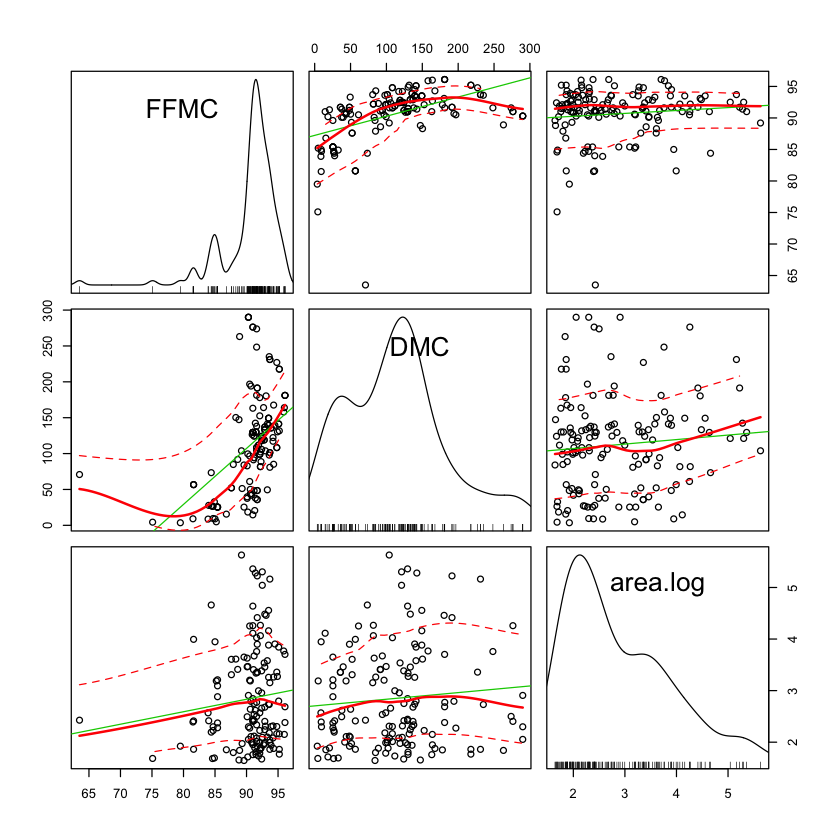

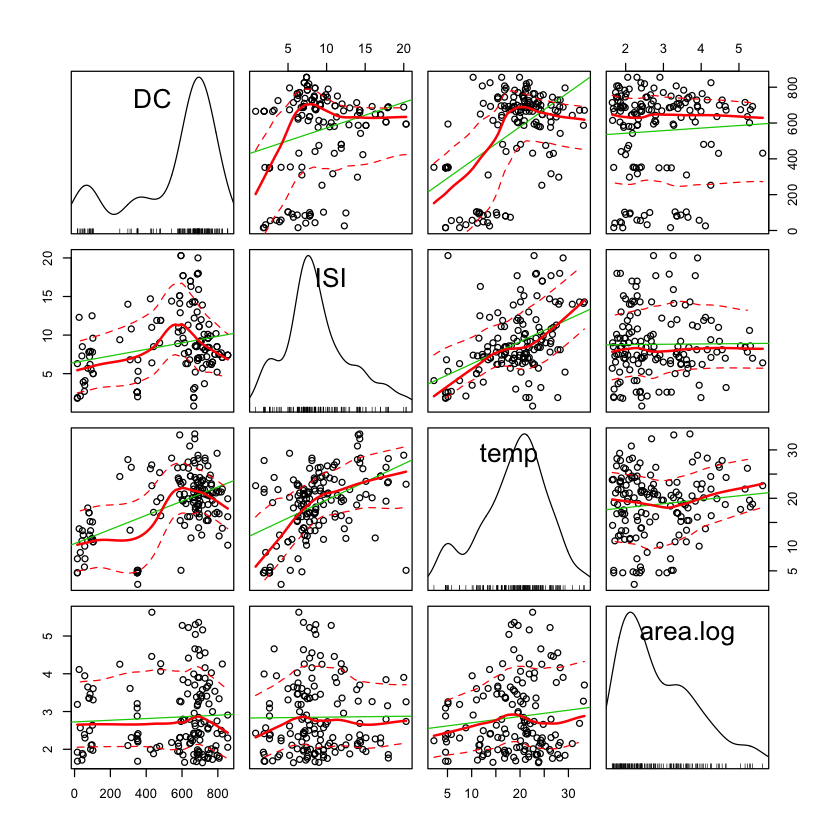

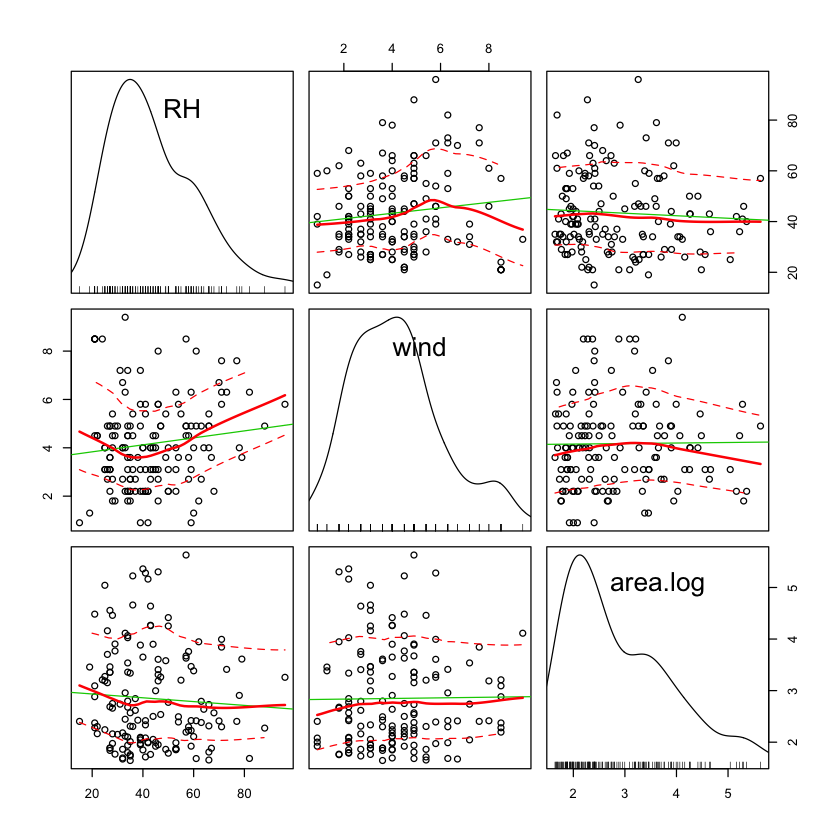

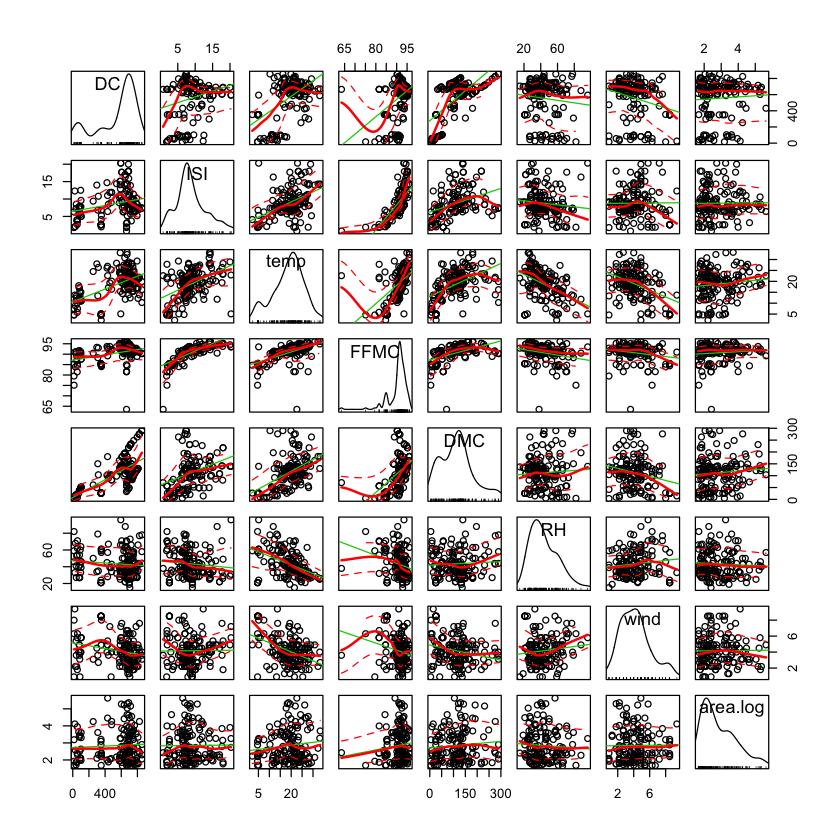

In [55]:
scatterplotMatrix(~ FFMC + DMC + area.log, data = fire.sub2)
scatterplotMatrix(~ DC + ISI + temp + area.log, data = fire.sub2)
scatterplotMatrix(~ RH + wind + area.log, data = fire.sub2)
scatterplotMatrix(~ DC + ISI + temp + FFMC + DMC + RH + wind + area.log, data = fire.sub2)

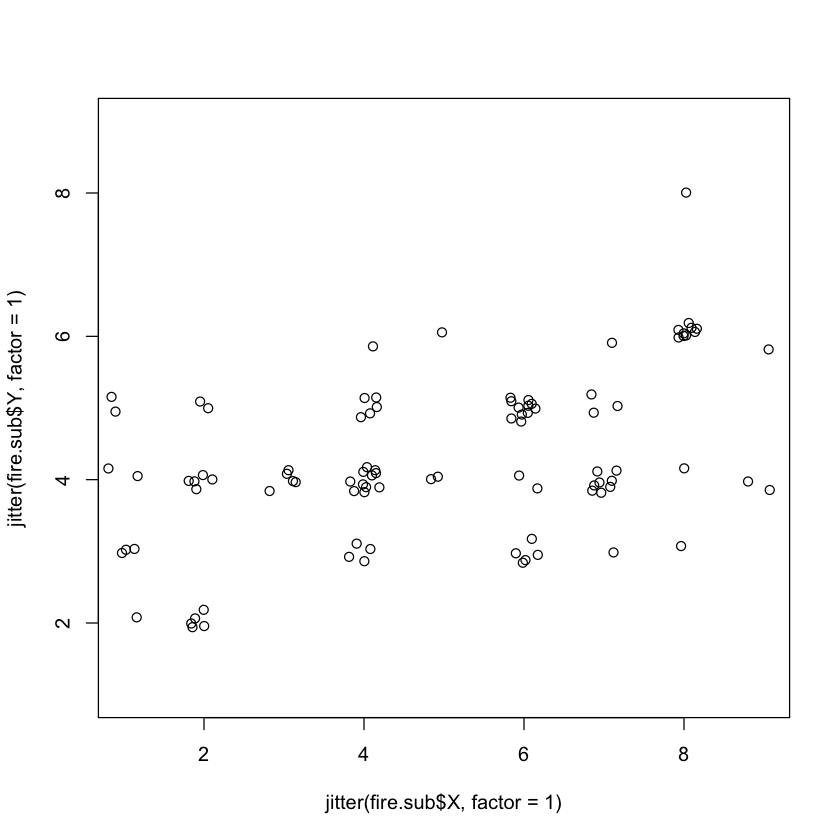

In [17]:
plot(jitter(fire.sub$X, factor = 1), jitter(fire.sub$Y, factor = 1),  xlim=c(1, 9), ylim=c(1, 9))

## Heatmap of Total Area Burned by Day of Week and Month

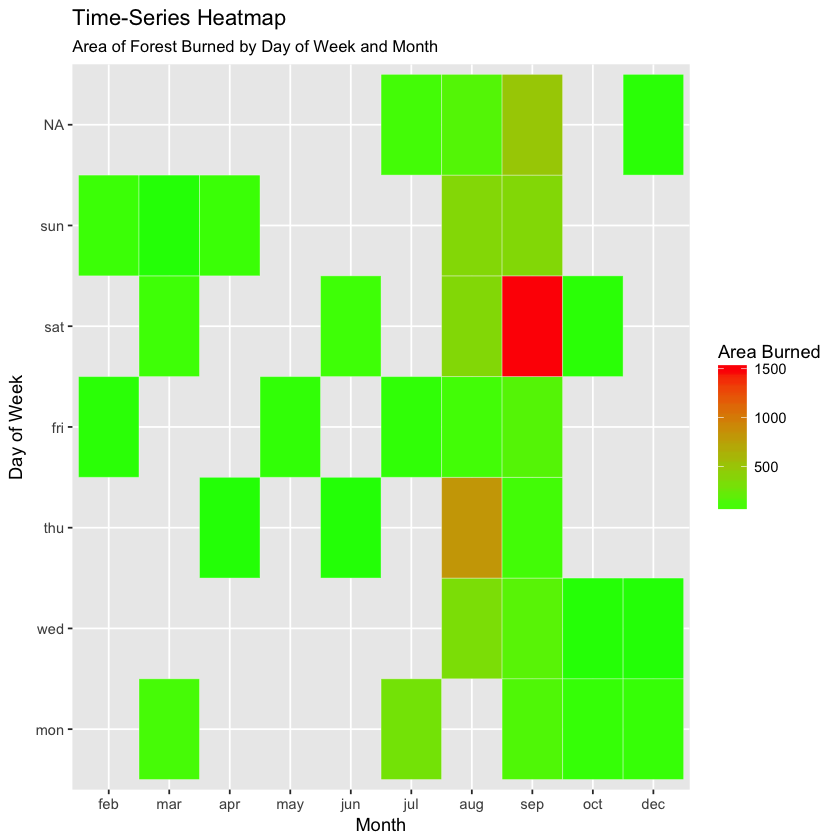

In [19]:
total.area = fire.sub %>%
    group_by(month, day) %>%
    summarise(total = sum(area))

#Code adapted from http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html on 14 May 2018
ggplot(total.area, aes(month, day, fill = total)) + 
  geom_tile(colour = "white") + 
  #facet_grid(year~monthf) + 
  scale_fill_gradient(low="green", high="red") +
  labs(x="Month",
       y="Day of Week",
       title = "Time-Series Heatmap", 
       subtitle="Area of Forest Burned by Day of Week and Month", 
       fill="Area Burned")

## Heatmap of Total Area Burned by X and Y Coordinate

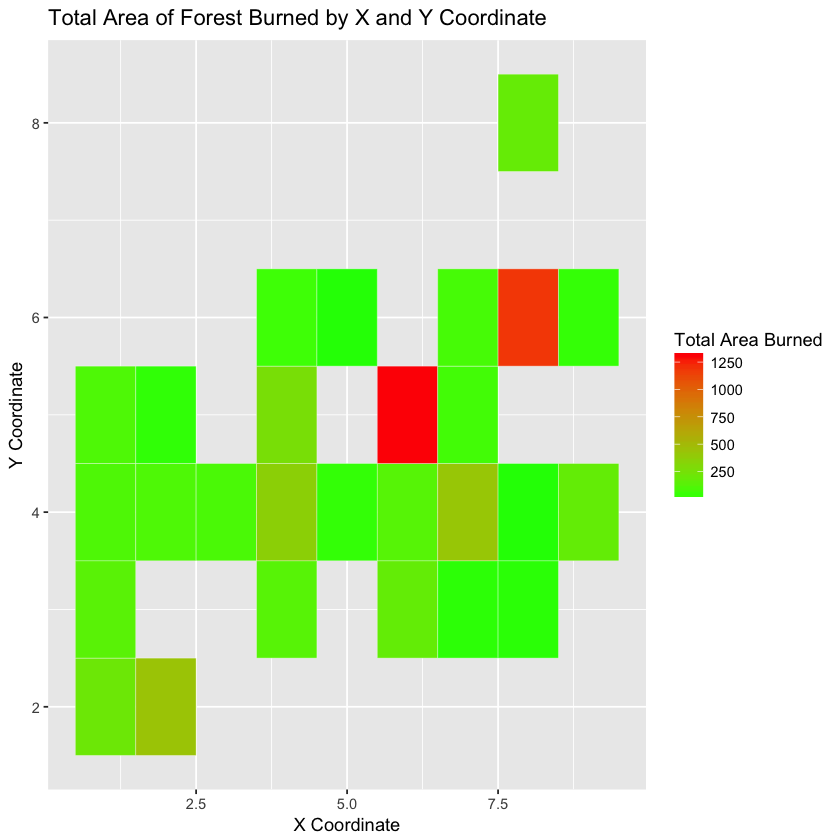

In [20]:
total.area.cor = fire.sub %>%
    group_by(X, Y) %>%
    summarise(total = sum(area))

#Code adapted from http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html on 14 May 2018
ggplot(total.area.cor, aes(X, Y, fill = total)) + 
  geom_tile(colour = "white") + 
  #facet_grid(year~monthf) + 
  scale_fill_gradient(low="green", high="red") +
  labs(x="X Coordinate",
       y="Y Coordinate",
       title = "Total Area of Forest Burned by X and Y Coordinate", 
       fill="Total Area Burned")

## Heatmap of Count of Incidents by Day of Week and Month

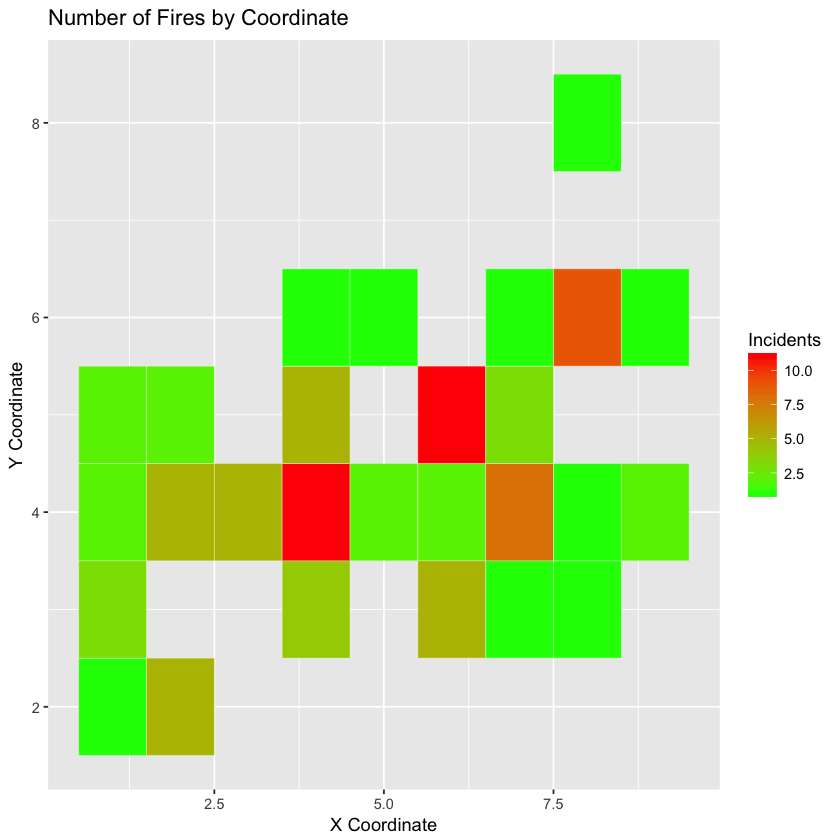

In [21]:
incidents = fire.sub %>%
    count(X, Y)

#Code adapted from http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html on 14 May 2018
ggplot(incidents, aes(X, Y, fill = n)) + 
  geom_tile(colour = "white") + 
  #facet_grid(year~monthf) + 
  scale_fill_gradient(low="green", high="red") +
  labs(x="X Coordinate",
       y="Y Coordinate",
       title = "Number of Fires by Coordinate", 
       fill="Incidents")